In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import training dataset
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Basic analysis

In [5]:
train_df.shape

(1460, 81)

In [6]:
# import test set
test_df = pd.read_csv('test.csv')

In [7]:
test_df.shape

(1459, 80)

In [8]:
# combine both the dataset
df = pd.concat([train_df, test_df])

In [9]:
df.shape

(2919, 81)

In [10]:
# saleprice is null for test set
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [11]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
# pecent of value missing
(df.isnull().sum()[df.isnull().sum()!=0]*100/len(df)).sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

drop columns which has more than 40% data is missing

## Columns with numerical values

In [13]:
# statistical analysis of SalePrice 
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

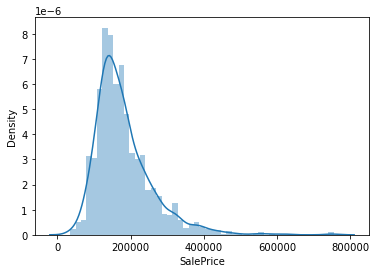

In [14]:
## SalePrice
sns.distplot(train_df['SalePrice'])

In [15]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='SalePrice'>

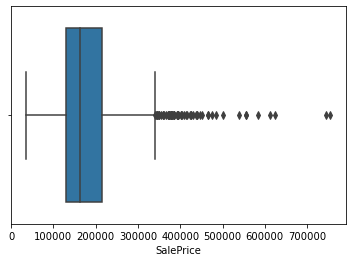

In [16]:
sns.boxplot(df['SalePrice'])

In [17]:
# SalePrice more than 400000
df[df['SalePrice']>400000][['YearBuilt','LotArea','OverallQual','GarageCars', 'SalePrice']]

,YearBuilt,LotArea,OverallQual,GarageCars,SalePrice
58,2006,13682,10,3.0,438780.0
161,2003,13688,9,3.0,412500.0
178,2008,17423,9,3.0,501837.0
185,1892,22950,10,3.0,475000.0
231,1995,15138,8,3.0,403000.0
278,2006,14450,9,3.0,415298.0
349,2005,20431,9,3.0,437154.0
389,2007,12474,10,3.0,426000.0
440,2008,15431,10,3.0,555000.0
473,2006,14977,8,3.0,440000.0


From above you can see that some houses are old but they are in good condition and has more area. So they are valid prices they can't consider as a outliers.

In [18]:
#correlation matrix
corrmat = df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


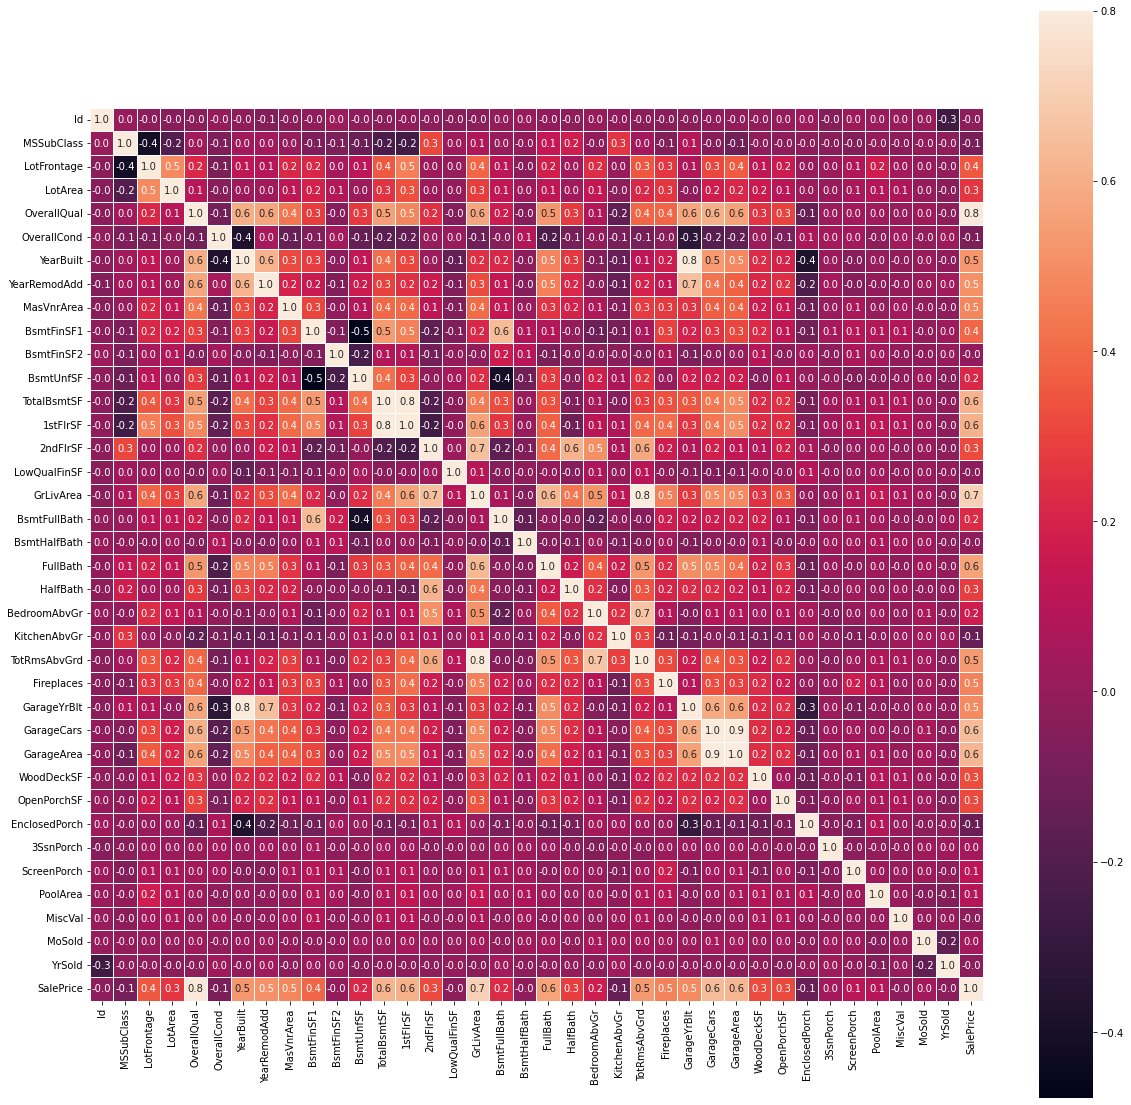

In [19]:
# Understanding correlation using Heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True,fmt=".1f",linewidth=.5);

YearBuilt = GarageYrBlt
GrLivArea = TotRmsAbvGrd, TotRmsAbvGrd
TotalBsmtSF = 1stFlrSF
GarageArea = GarageCars 

In [20]:
# columns present in correlation metrics (numerical)
corrmat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

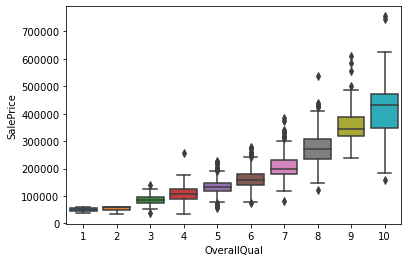

In [21]:
sns.boxplot(df['OverallQual'], df['SalePrice'])

SalePrice increases as OverallQual increases

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

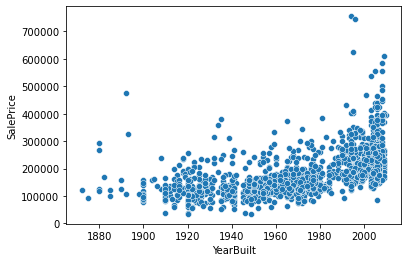

In [22]:
sns.scatterplot(df['YearBuilt'], df['SalePrice'])

Newer houses has more price than old houses

In [23]:
df[['FullBath','SalePrice']].groupby(by=df['FullBath']).mean().sort_values('SalePrice', ascending=False)

,FullBath,SalePrice
FullBath,,
3,3.0,347822.909091
2,2.0,213009.825521
0,0.0,165200.888889
1,1.0,134751.440000
4,4.0,NaN


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

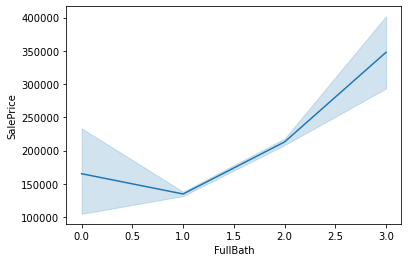

In [24]:
sns.lineplot(train_df['FullBath'],train_df['SalePrice'])

<AxesSubplot:ylabel='Density'>

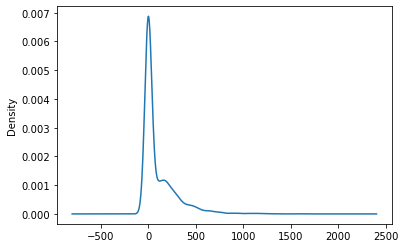

In [25]:
df['MasVnrArea'].plot(kind='kde')

In [26]:
df['MasVnrArea'].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

most of the values are 0 in MasVnrArea

#### From heatmap below category of columns are created according to relation with SalePrice


In [27]:
# features which has minimum/no relation with SalePrice
min_relation = ['Id', 'MSSubClass', 'OverallCond','BsmtFinSF2',
'BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath',
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF',
'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
'MiscVal', 'MoSold', 'YrSold',
]

In [28]:
modrate_relation = [ 'LotFrontage','LotArea','BsmtFinSF1']

In [29]:
high_relation = [ 'OverallQual', 'YearBuilt','YearRemodAdd',
'MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath',
'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','SalePrice'
]

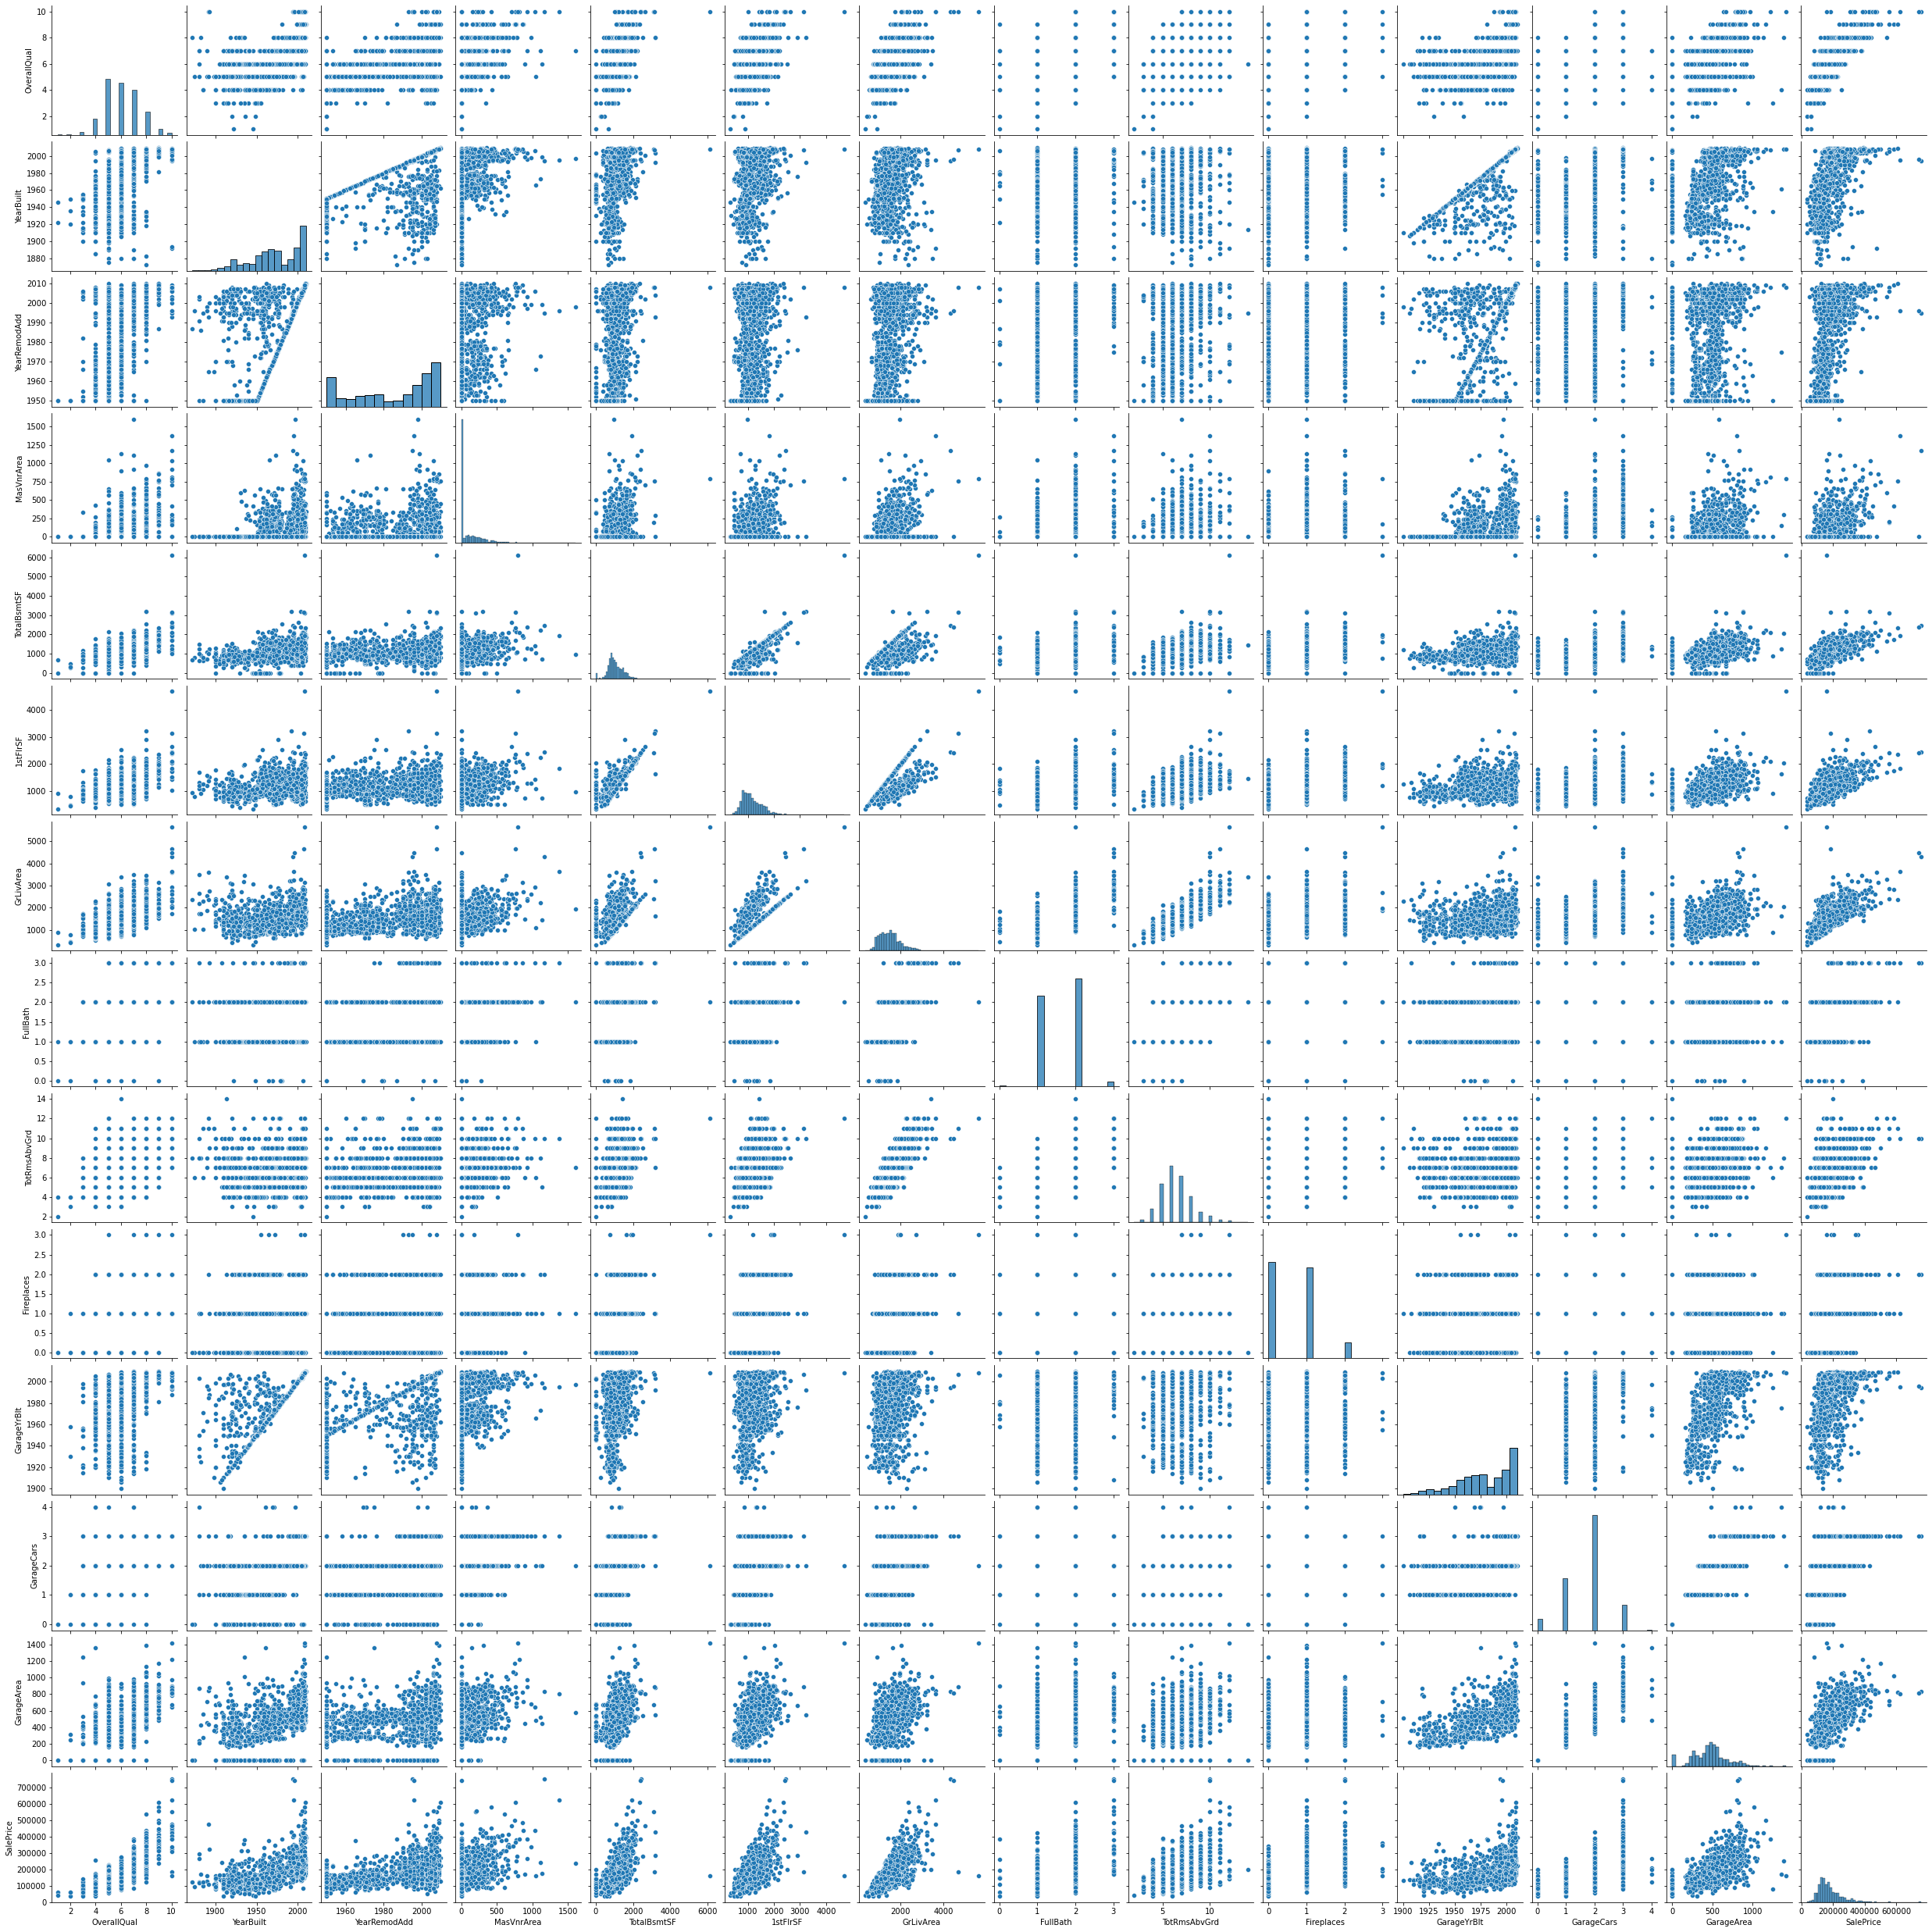

In [30]:
sns.pairplot(train_df[high_relation])

YearBuilt = GarageYrblt, YearRemodAdd

1. GarageYrblt - is same as YearBuilt
2. YearRemodAdd and YearBuilt  are mostly dependent because YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

### drop numerical columns


In [31]:
# these are the columns which has no use
to_drop = ['Id', 'LotFrontage','PoolQC','MiscFeature', 'Alley','Fence','FireplaceQu','GarageYrBlt',
          'TotRmsAbvGrd','TotRmsAbvGrd','1stFlrSF','GarageArea','YearRemodAdd', 'MSSubClass', 'OverallCond','BsmtFinSF2',
'BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath',
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF',
'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
'MiscVal', 'MoSold', 'YrSold','MasVnrArea']

seprate numerical and categorical data and then make analysis

In [32]:
len(to_drop)

34

In [33]:
len(corrmat.columns)

38

out of 38 columns 33 columns has to drop

## Columns which has Object data type

In [34]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
len(object_columns)

43

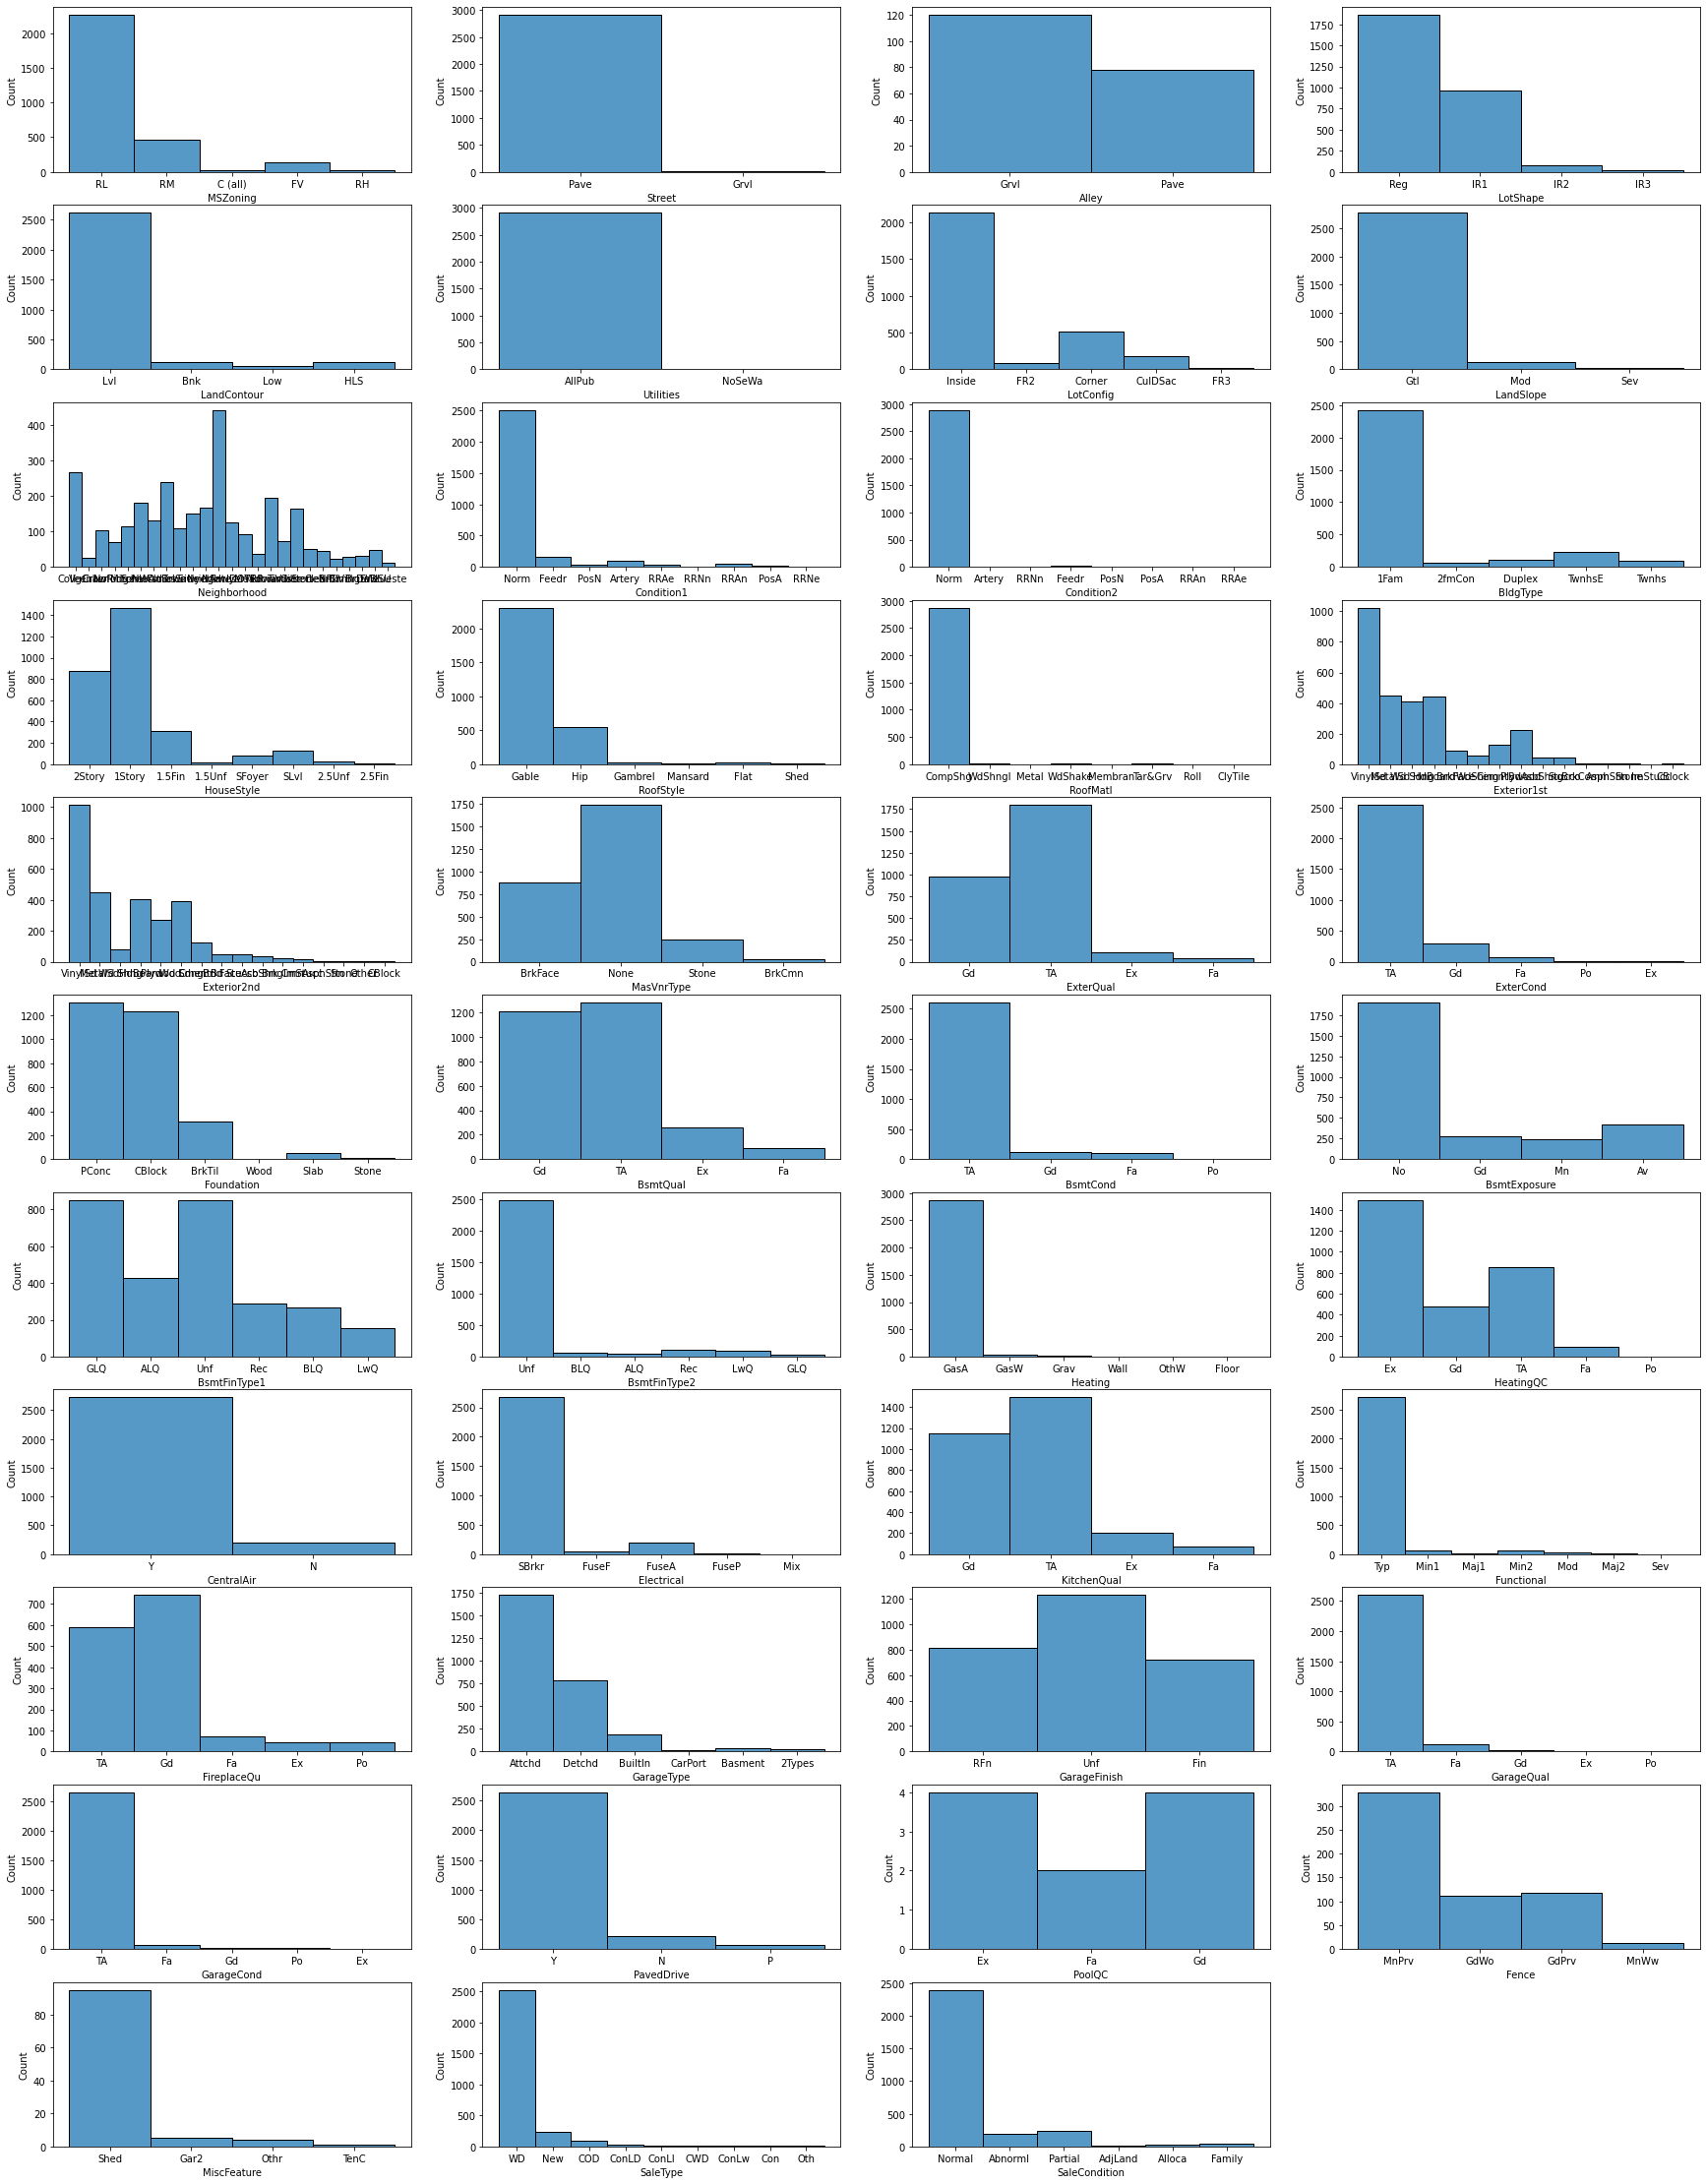

In [36]:
plt.figure(figsize=(30,40))
try:
    for i in enumerate(object_columns):
        plt.subplot(11,4,i[0]+1)
        sns.histplot(df[i[1]])
except:
    pass

In [37]:
df['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [38]:
# LotShape: General shape of property
df['LotShape'].value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [39]:
# LandContour: Flatness of the property
df['LandContour'].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [40]:
# Utilities: Type of utilities available
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
# LotConfig: Lot configuration
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [42]:
# LandSlope: Slope of property
# drop this because LandSlope and LandContour will give same info
df['LandSlope'].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

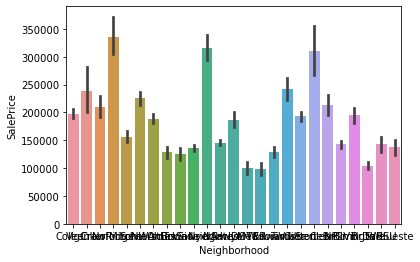

In [43]:
# Neighborhood: Physical locations within Ames city limits
sns.barplot(x=df['Neighborhood'],y=df['SalePrice'])

In [44]:
gb=df[['Neighborhood','SalePrice']].groupby(by=df['Neighborhood']).mean()

In [45]:
gb.sort_values('SalePrice', ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


In [46]:
# BldgType: Type of dwelling
df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [47]:
df[['BldgType','SalePrice']].groupby(by=df['BldgType']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
BldgType,
1Fam,185763.807377
TwnhsE,181959.342105
Twnhs,135911.627907
Duplex,133541.076923
2fmCon,128432.258065


In [48]:
# HouseStyle: Style of dwelling
df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [49]:
df[['HouseStyle','SalePrice']].groupby(by=df['HouseStyle']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
HouseStyle,
2.5Fin,220000.000000
2Story,210051.764045
1Story,175985.477961
SLvl,166703.384615
2.5Unf,157354.545455
1.5Fin,143116.740260
SFoyer,135074.486486
1.5Unf,110150.000000


HouseStyle and BldgType give same info hence drop BldgType

In [50]:
# RoofStyle: Type of roof
df[['RoofStyle','SalePrice']].groupby(by=df['RoofStyle']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
RoofStyle,
Shed,225000.000000
Hip,218876.933566
Flat,194690.000000
Mansard,180568.428571
Gable,171483.956179
Gambrel,148909.090909


In [51]:
df['RoofStyle'].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [52]:
# Exterior1st: Exterior covering on house
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [53]:
df[['Exterior1st','SalePrice']].groupby(by=df['Exterior1st']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
Exterior1st,
ImStucc,262000.000000
Stone,258500.000000
CemntBd,231690.655738
VinylSd,213732.900971
BrkFace,194573.000000
Plywood,175942.379630
HdBoard,163077.450450
Stucco,162990.000000
WdShing,150655.076923


In [54]:
# ExterQual: Evaluates the quality of the material on the exterior
df[['ExterQual','SalePrice']].groupby(by=df['ExterQual']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
ExterQual,
Ex,367360.961538
Gd,231633.510246
TA,144341.313466
Fa,87985.214286


ExterQual will give all the imp info about external quality of wall

In [55]:
# BsmtQual: Evaluates the height of the basement
df[['BsmtQual','SalePrice']].groupby(by=df['BsmtQual']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
BsmtQual,
Ex,327041.041322
Gd,202688.478964
TA,140759.818182
Fa,115692.028571


BsmtQual will all info about basement

In [56]:
# KitchenQual: Kitchen quality
df[['KitchenQual','SalePrice']].groupby(by=df['KitchenQual']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
KitchenQual,
Ex,328554.670000
Gd,212116.023891
TA,139962.511565
Fa,105565.205128


In [57]:
# FireplaceQu: Fireplace quality
df[['FireplaceQu','SalePrice']].groupby(by=df['FireplaceQu']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
FireplaceQu,
Ex,337712.500000
Gd,226351.415789
TA,205723.488818
Fa,167298.484848
Po,129764.150000


In [58]:
# GarageFinish: Interior finish of the garage
df[['GarageFinish','SalePrice']].groupby(by=df['GarageFinish']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
GarageFinish,
Fin,240052.690341
RFn,202068.869668
Unf,142156.423140


In [59]:
# PoolQC: Pool quality
df[['PoolQC','SalePrice']].groupby(by=df['PoolQC']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
PoolQC,
Ex,490000.0
Fa,215500.0
Gd,201990.0


In [60]:
# Fence: Fence quality
df[['Fence','SalePrice']].groupby(by=df['Fence']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
Fence,
GdPrv,178927.457627
MnPrv,148751.089172
GdWo,140379.314815
MnWw,134286.363636


In [61]:
# MiscFeature: Miscellaneous feature not covered in other categories
df[['MiscFeature','SalePrice']].groupby(by=df['MiscFeature']).mean().sort_values('SalePrice', ascending=False)

,SalePrice
MiscFeature,
TenC,250000.000000
Gar2,170750.000000
Shed,151187.612245
Othr,94000.000000


#### drop some features which has object data type

In [62]:
# columns which has to drop 
# by doing below analysis
drop = ['Street','LotShape','Utilities','LandSlope','Condition1', 'Condition2',
       'BldgType','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
       'ExterCond','Foundation','BsmtCond','BsmtExposure','BsmtFinSF1',
       'BsmtFinType2','Heating','CentralAir','Electrical','Functional',
       'GarageType','GarageQual','GarageCond','PavedDrive','MiscFeature',
       'SaleType','SaleCondition','BsmtFinType1','BsmtQual','GarageFinish']

In [63]:
to_drop.extend(drop)

In [64]:
len(to_drop)

65

In [65]:
len(drop)

31

In [66]:
new_df= df.drop(columns=to_drop)

In [67]:
new_df.head()

,MSZoning,LotArea,LandContour,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,RoofStyle,ExterQual,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,SalePrice
0,RL,8450,Lvl,Inside,CollgCr,2Story,7,2003,Gable,Gd,856.0,Ex,1710,2,Gd,0,2.0,208500.0
1,RL,9600,Lvl,FR2,Veenker,1Story,6,1976,Gable,TA,1262.0,Ex,1262,2,TA,1,2.0,181500.0
2,RL,11250,Lvl,Inside,CollgCr,2Story,7,2001,Gable,Gd,920.0,Ex,1786,2,Gd,1,2.0,223500.0
3,RL,9550,Lvl,Corner,Crawfor,2Story,7,1915,Gable,TA,756.0,Gd,1717,1,Gd,1,3.0,140000.0
4,RL,14260,Lvl,FR2,NoRidge,2Story,8,2000,Gable,Gd,1145.0,Ex,2198,2,Gd,1,3.0,250000.0


In [68]:
new_df.shape

(2919, 18)

In [69]:
new_df.isnull().sum()

MSZoning           4
LotArea            0
LandContour        0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
YearBuilt          0
RoofStyle          0
ExterQual          0
TotalBsmtSF        1
HeatingQC          0
GrLivArea          0
FullBath           0
KitchenQual        1
Fireplaces         0
GarageCars         1
SalePrice       1459
dtype: int64

In [70]:
# we will replace the missing values by most frequent value
# new_df['MSZoning'].value_counts() # to calculate most frequent value
new_df['MSZoning'].fillna('RL',inplace=True)

In [71]:
# fillna with mean value
new_df['TotalBsmtSF'].fillna(new_df['TotalBsmtSF'].mean(),inplace=True)

In [72]:
# we will replace the missing values by most frequent value
# new_df['KitchenQual'].value_counts()
new_df['KitchenQual'].fillna('TA', inplace=True)

In [73]:
# we will replace the missing values by most frequent value
# new_df['GarageCars'].value_counts()
new_df['GarageCars'].fillna(2.0, inplace=True)

In [74]:
new_df.isnull().sum()

MSZoning           0
LotArea            0
LandContour        0
LotConfig          0
Neighborhood       0
HouseStyle         0
OverallQual        0
YearBuilt          0
RoofStyle          0
ExterQual          0
TotalBsmtSF        0
HeatingQC          0
GrLivArea          0
FullBath           0
KitchenQual        0
Fireplaces         0
GarageCars         0
SalePrice       1459
dtype: int64

In [75]:
len(new_df.columns)

18

In [76]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2919 non-null   object 
 1   LotArea       2919 non-null   int64  
 2   LandContour   2919 non-null   object 
 3   LotConfig     2919 non-null   object 
 4   Neighborhood  2919 non-null   object 
 5   HouseStyle    2919 non-null   object 
 6   OverallQual   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   RoofStyle     2919 non-null   object 
 9   ExterQual     2919 non-null   object 
 10  TotalBsmtSF   2919 non-null   float64
 11  HeatingQC     2919 non-null   object 
 12  GrLivArea     2919 non-null   int64  
 13  FullBath      2919 non-null   int64  
 14  KitchenQual   2919 non-null   object 
 15  Fireplaces    2919 non-null   int64  
 16  GarageCars    2919 non-null   float64
 17  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), obj

### Feture transformation

In [77]:
# convet year column from int to datetime
new_df['YearBuilt'] = pd.to_datetime(new_df['YearBuilt'], format='%Y').dt.year

In [78]:
# ExterQual ordinal numbering
new_df['ExterQual'] = new_df['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1})

In [79]:
# HeatingQC ordinal numbering
new_df['HeatingQC'] = new_df['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [80]:
# KitchenQual ordinal numbering
new_df['KitchenQual'] = new_df['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1})

In [81]:
columns_ = ['MSZoning','LandContour','LotConfig','Neighborhood','HouseStyle','RoofStyle']

In [82]:
df_encoded = pd.get_dummies(new_df, columns=columns_, drop_first=True)

In [83]:
df_encoded.head()

,LotArea,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,KitchenQual,Fireplaces,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,8450,7,2003,3,856.0,5,1710,2,3,0,...,0,0,1,0,0,1,0,0,0,0
1,9600,6,1976,2,1262.0,5,1262,2,2,1,...,0,0,0,0,0,1,0,0,0,0
2,11250,7,2001,3,920.0,5,1786,2,3,1,...,0,0,1,0,0,1,0,0,0,0
3,9550,7,1915,2,756.0,4,1717,1,3,1,...,0,0,1,0,0,1,0,0,0,0
4,14260,8,2000,3,1145.0,5,2198,2,3,1,...,0,0,1,0,0,1,0,0,0,0


In [84]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotArea               2919 non-null   int64  
 1   OverallQual           2919 non-null   int64  
 2   YearBuilt             2919 non-null   int64  
 3   ExterQual             2919 non-null   int64  
 4   TotalBsmtSF           2919 non-null   float64
 5   HeatingQC             2919 non-null   int64  
 6   GrLivArea             2919 non-null   int64  
 7   FullBath              2919 non-null   int64  
 8   KitchenQual           2919 non-null   int64  
 9   Fireplaces            2919 non-null   int64  
 10  GarageCars            2919 non-null   float64
 11  SalePrice             1460 non-null   float64
 12  MSZoning_FV           2919 non-null   uint8  
 13  MSZoning_RH           2919 non-null   uint8  
 14  MSZoning_RL           2919 non-null   uint8  
 15  MSZoning_RM          

## seprate train and test set

In [85]:
train =df_encoded.iloc[:1460,:]

In [86]:
test = df_encoded.iloc[1460:,:]

In [87]:
print('training set: ',train.shape)
print('testing set: ',test.shape)

training set:  (1460, 59)
testing set:  (1459, 59)


In [88]:
train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [89]:
test['SalePrice']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [90]:
# we will drop the SalePrice column from test set
test.drop('SalePrice', axis=1, inplace=True)

In [91]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [98]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [118]:
# gradient boost
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth= 5, n_estimators= 50)
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50)

In [108]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def regression_metrics(true_values, predicted_values):
   
    metrics = {}

    # Calculate Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(true_values, predicted_values)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(true_values, predicted_values)
    metrics['MSE'] = mse

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    metrics['RMSE'] = rmse

    # Calculate R-squared (R2) Score
    metrics['R2'] = r2_score(true_values, predicted_values)

    return metrics

In [109]:
# Random forest
rf_pred = rf.predict(X_test)

regression_metrics(y_test, rf_pred)

{'MAE': 16992.8879419439,
 'MSE': 665225479.8555194,
 'RMSE': 25791.965412808684,
 'R2': 0.904669455205776}

In [116]:
# gradient boost
gb_pred = gb.predict(X_test)

regression_metrics(y_test, gb_pred)

{'MAE': 16893.51056530365,
 'MSE': 605087076.6868602,
 'RMSE': 24598.517774184285,
 'R2': 0.9132876259023767}

In [114]:
# hyperparameter tunning for gradient boost
from sklearn.model_selection import GridSearchCV

# Assuming you have X_train, y_train, X_test, y_test ready

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8]
}

# Create a GradientBoostingRegressor object
gb_reg = GradientBoostingRegressor()

# Create a GridSearchCV object with cross-validation (you can change cv value)
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error on Test Data: {mse}")
print(f'r2_score: {r2}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.

### submission

In [120]:
# convert test set from Dataframe to numpy array
test_num = test.iloc[:,:].values

In [121]:
test_num

array([[1.1622e+04, 5.0000e+00, 1.9610e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4267e+04, 6.0000e+00, 1.9580e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.3830e+04, 5.0000e+00, 1.9970e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+04, 5.0000e+00, 1.9600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0441e+04, 5.0000e+00, 1.9920e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.6270e+03, 7.0000e+00, 1.9930e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [123]:
# prediction on test set
sub_pred = gb.predict(test_num)

In [124]:
sub_pred

array([120164.06634973, 153920.85850773, 167087.20831765, ...,
       158251.87745548, 125676.83729181, 207007.68948689])

In [126]:
# add saleprice to test_df file 
test_df['SalePrice'] = sub_pred

In [127]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,120164.066350
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,153920.858508
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,167087.208318
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,185369.067581
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,235150.612350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,85136.511495
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,89686.781493
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,158251.877455
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,125676.837292


In [130]:
# take Id and saleprice and convert it to csv file for submission
test_df[['Id','SalePrice']].to_csv('House_price_submission.csv',index=False)

In [131]:
df = pd.read_csv('House_price_submission.csv')
df.head()

,Id,SalePrice
0,1461,120164.066350
1,1462,153920.858508
2,1463,167087.208318
3,1464,185369.067581
4,1465,235150.612350
